In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import randint

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing input data
df = pd.read_csv('/content/input.csv')
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


## Data Cleaning


In [ ]:
# Check for duplicated data
df.duplicated().value_counts()

False    100000
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [ ]:
# Check for unbalanced dataset
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

Balanced Dataset

In [ ]:
# Correlation between features and target variable
df.corr()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


<Axes: >

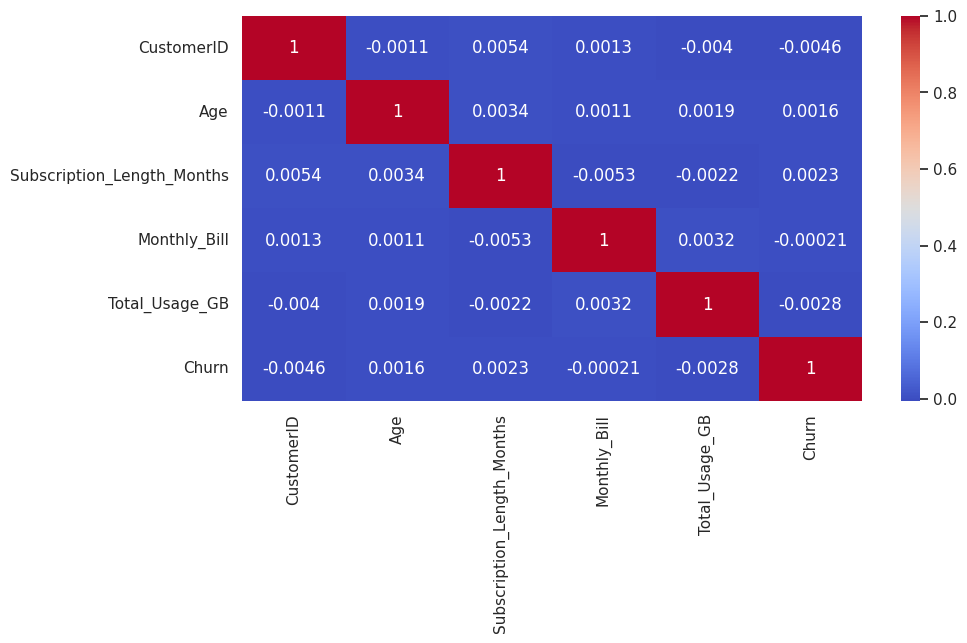

In [ ]:
# Heat map for correlation
sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


No Correlation between the features and target variable

In [ ]:
# check for null values
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

No missing values

In [ ]:
# check on data distribution
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


Widely distributed data, So we need to perform normalisation or standardization

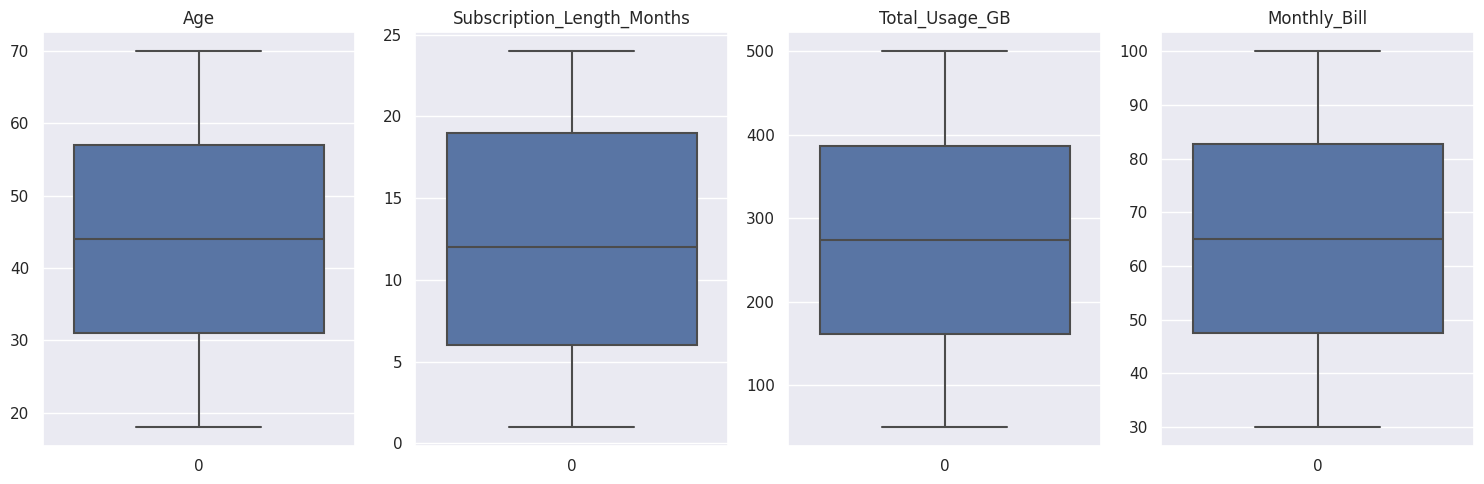

In [ ]:
# Check for Outliers

figure, axes = plt.subplots(1,4, sharex=True, figsize=(15,5))
sns.boxplot(ax = axes[0], data = df['Age'])
axes[0].set_title("Age")
sns.boxplot(ax = axes[1], data = df['Subscription_Length_Months'])
axes[1].set_title("Subscription_Length_Months")
sns.boxplot(ax = axes[2], data = df['Total_Usage_GB'])
axes[2].set_title("Total_Usage_GB")
sns.boxplot(ax = axes[3], data = df['Monthly_Bill'])
axes[3].set_title("Monthly_Bill")
plt.tight_layout()

## EDA

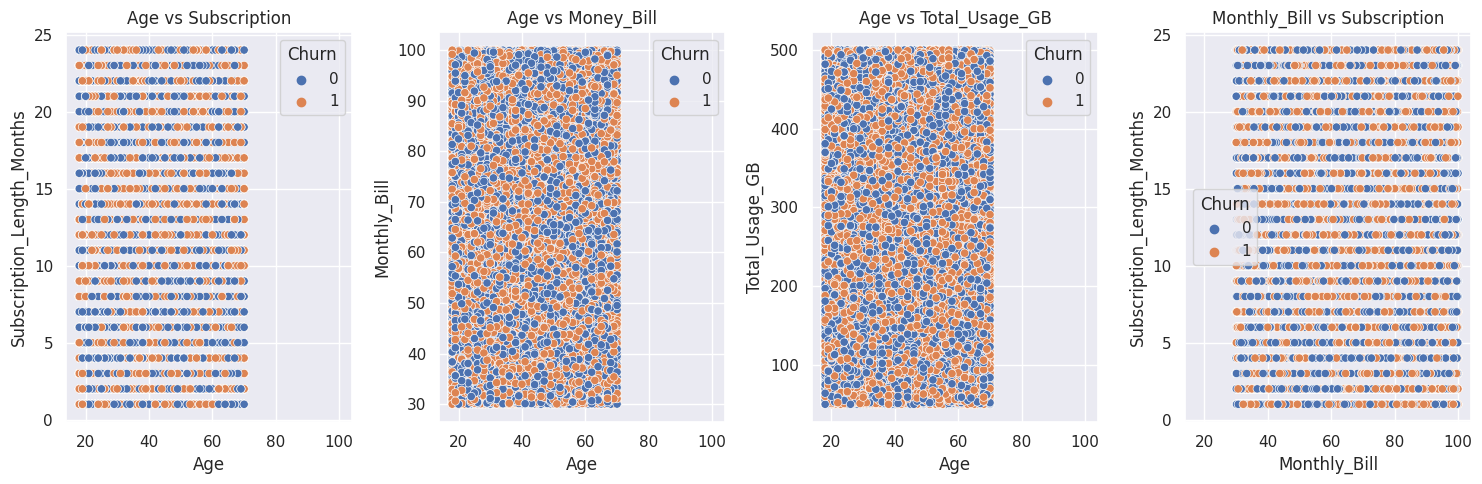

In [ ]:
# Scatter plot for all features
figure, axes = plt.subplots(1,4, sharex=True, figsize=(15,5))
sns.scatterplot(ax = axes[0],data = df, x = "Age", y = 'Subscription_Length_Months', hue = 'Churn')
axes[0].set_title("Age vs Subscription")
sns.scatterplot(ax = axes[1],data = df, x = "Age", y = 'Monthly_Bill', hue = 'Churn')
axes[1].set_title("Age vs Money_Bill")
sns.scatterplot(ax = axes[2],data = df, x = "Age", y = 'Total_Usage_GB', hue = 'Churn')
axes[2].set_title("Age vs Total_Usage_GB")
sns.scatterplot(ax = axes[3],data = df, x = "Monthly_Bill", y = 'Subscription_Length_Months', hue = 'Churn')
axes[3].set_title("Monthly_Bill vs Subscription")
plt.tight_layout()


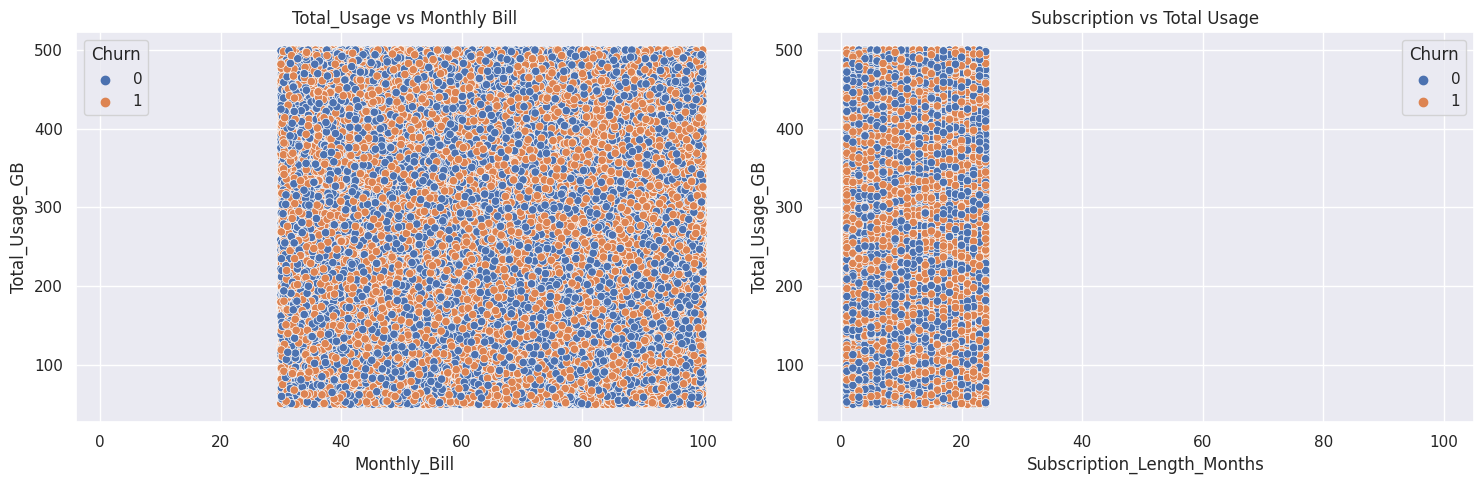

In [ ]:
figure, axes = plt.subplots(1,2, sharex=True, figsize=(15,5))
sns.scatterplot(ax = axes[1],data = df, x = "Subscription_Length_Months", y = 'Total_Usage_GB', hue = 'Churn')
axes[1].set_title("Subscription vs Total Usage")
sns.scatterplot(ax = axes[0],data = df, x = "Monthly_Bill", y = 'Total_Usage_GB', hue = 'Churn')
axes[0].set_title("Total_Usage vs Monthly Bill")
plt.tight_layout()

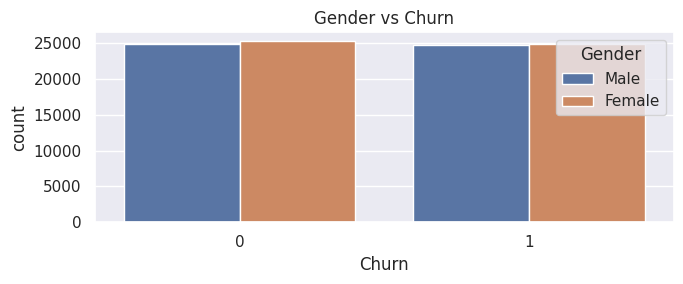

In [ ]:
plt.figure(figsize = (7, 3))
sns.countplot(x = df['Churn'], hue = df['Gender'])
plt.title('Gender vs Churn')
plt.tight_layout()
plt.show()

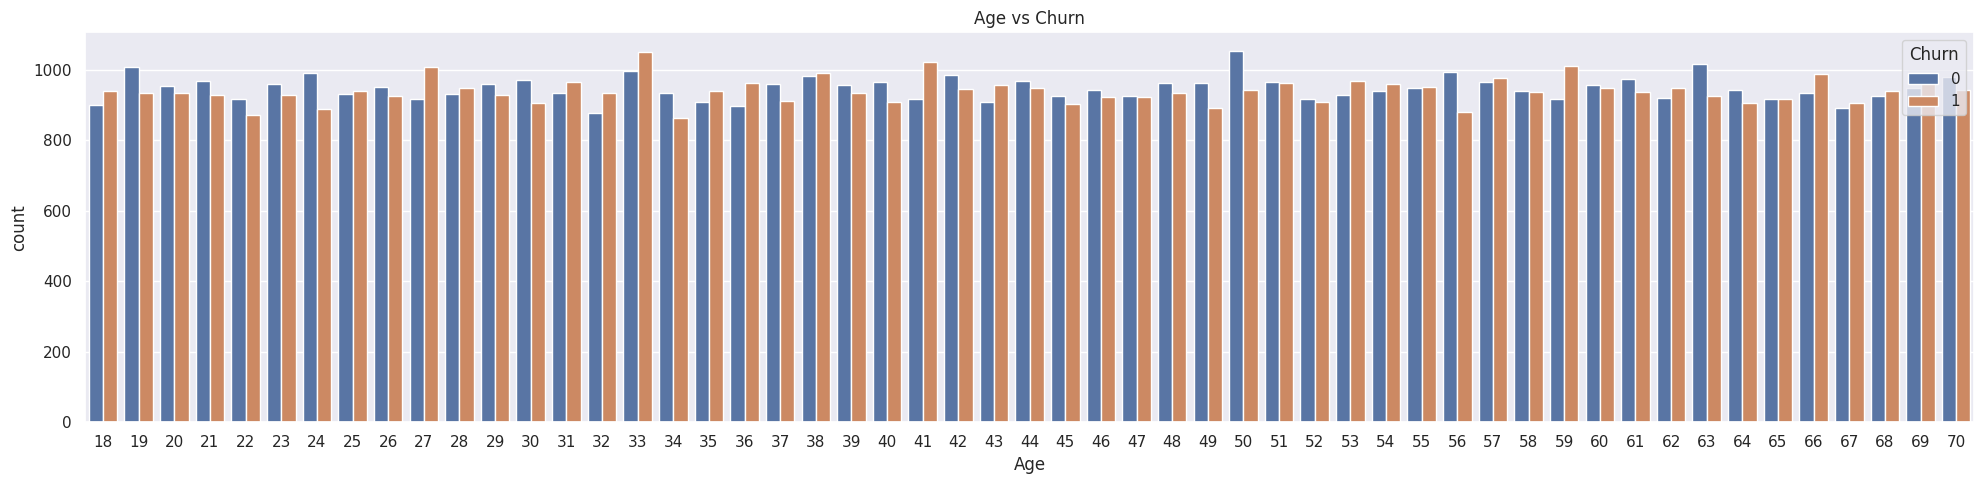

In [ ]:
plt.figure(figsize = (20, 5))
sns.countplot(x = df['Age'], hue = df['Churn'])
plt.title('Age vs Churn')
plt.tight_layout()
plt.show()

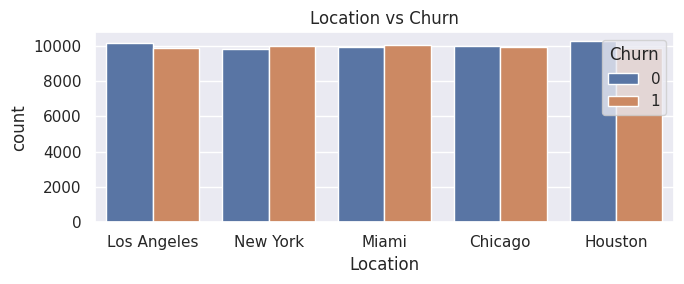

In [ ]:
plt.figure(figsize = (7, 3))
sns.countplot(x = df['Location'], hue = df['Churn'])
plt.title('Location vs Churn')
plt.tight_layout()
plt.show()

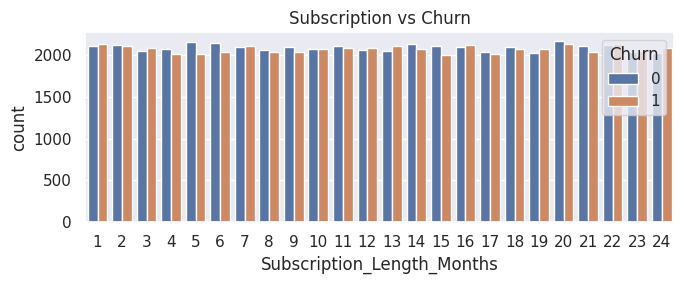

In [ ]:
plt.figure(figsize = (7, 3))
sns.countplot(x = df['Subscription_Length_Months'], hue = df['Churn'])
plt.title('Subscription vs Churn')
plt.tight_layout()
plt.show()

### Feature Engineering

In [ ]:
# Converting categorical data using LabelEncoder

le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,1,2,17,73.36,236,0
1,2,Customer_2,62,0,4,1,48.76,172,0
2,3,Customer_3,24,0,2,5,85.47,460,0
3,4,Customer_4,36,0,3,3,97.94,297,1
4,5,Customer_5,46,0,3,19,58.14,266,0


In [ ]:
# Dropping columns that has no effect on target prediction

df.drop(columns = ['Name','CustomerID'], inplace = True)

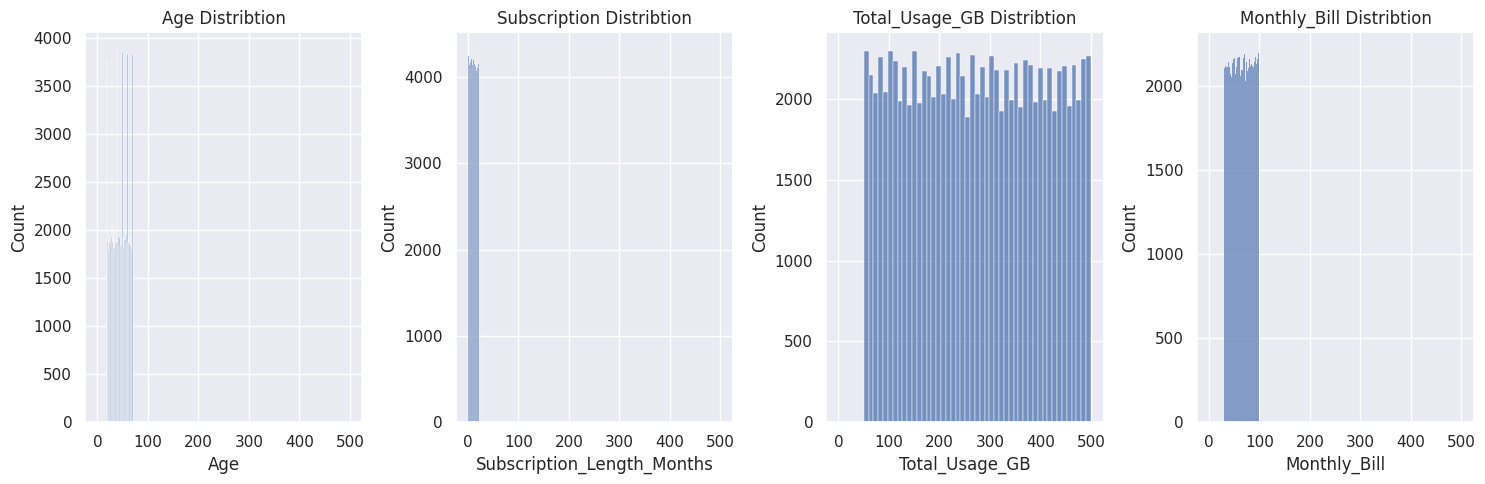

In [ ]:
# Check on data distribution

figure, axes = plt.subplots(1,4, sharex=True, figsize=(15,5))
sns.histplot(ax = axes[0], data = df, x = df['Age'])
axes[0].set_title("Age Distribtion")
sns.histplot(ax = axes[1], data = df, x = df['Subscription_Length_Months'])
axes[1].set_title("Subscription Distribtion")
sns.histplot(ax = axes[2], data = df, x = df['Total_Usage_GB'])
axes[2].set_title("Total_Usage_GB Distribtion")
sns.histplot(ax = axes[3], data = df, x = df['Monthly_Bill'])
axes[3].set_title("Monthly_Bill Distribtion")
plt.tight_layout()

No normal or Gaussian distribution, So normalization has to be performed

In [ ]:
# Spliting training and testing data

x = df.drop(columns = ['Churn'])
y = df['Churn']
xtrain, xtest, ytrain, ytest = train_test_split(x, y , test_size = 0.30, random_state = 20, shuffle=False)

In [ ]:
# Function to calculate feature importance

def plot_importances(model, model_name, features_to_plot, feature_names):
    #fit model and performances
    model.fit(xtrain,ytrain)
    importances = model.feature_importances_

    # sort and rank importances
    indices = np.argsort(importances)
    best_features = np.array(feature_names)[indices][-features_to_plot:]
    values = importances[indices][-features_to_plot:]
    print(values)
    print(best_features)

def best_features(model, features_to_plot, feature_names):
    # get list of best features
    model.fit(X,y)
    importances = model.feature_importances_

    indices = np.argsort(importances)
    best_features = np.array(feature_names)[indices][-features_to_plot:]
    return best_features

In [ ]:
# Check on feature importance

feature_names = list(xtrain.columns)

model1 = RandomForestClassifier(random_state = 1234)
print('Random Forest')
plot_importances(model1, 'Random Forest', 10, feature_names)

model2 = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, max_depth = 1, random_state = 0)
print('XGBoost')
plot_importances(model2, 'XGBoost', 10, feature_names)

model3 = AdaBoostClassifier(n_estimators = 100, learning_rate = 1.0, random_state = 0)
print('AdaBoost')
plot_importances(model3, 'AdaBoost', 10, feature_names)

Random Forest
[0.01823448 0.05012243 0.14147924 0.18567675 0.28941932 0.31506779]
['Gender' 'Location' 'Subscription_Length_Months' 'Age' 'Total_Usage_GB'
 'Monthly_Bill']
XGBoost
[0.         0.01962688 0.03715258 0.14739394 0.35826558 0.43756101]
['Gender' 'Location' 'Subscription_Length_Months' 'Age' 'Total_Usage_GB'
 'Monthly_Bill']
AdaBoost
[0.   0.01 0.05 0.15 0.37 0.42]
['Gender' 'Location' 'Subscription_Length_Months' 'Age' 'Total_Usage_GB'
 'Monthly_Bill']


In [ ]:
# Normalization

from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(xtrain)
xtrain = norm.transform(xtrain)
xtest = norm.transform(xtest)

### Model Selection

In [ ]:
rfmodel = RandomForestClassifier(n_estimators = 50)
svc_model = SVC()
dtree = DecisionTreeClassifier()
lr_model = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 6)
nb_model = GaussianNB()

In [ ]:
models = {
    'logistic regression' : lr_model,
    'KNN classifier' : knn,
    'Decision Tree' : dtree,
    'Random Forest' : rfmodel,
    'Naive Bayes' : nb_model,
    'SVM' : svc_model
}

for name , model in models.items():
  model.fit(xtrain, ytrain)
  ypred = model.predict(xtest)
  classi = classification_report(ytest, ypred)
  print(f'Report for {name}')
  print(classi)

Report for logistic regression
              precision    recall  f1-score   support

           0       0.51      0.69      0.58     15088
           1       0.51      0.33      0.40     14912

    accuracy                           0.51     30000
   macro avg       0.51      0.51      0.49     30000
weighted avg       0.51      0.51      0.49     30000

Report for KNN classifier
              precision    recall  f1-score   support

           0       0.50      0.66      0.57     15088
           1       0.50      0.34      0.41     14912

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000

Report for Decision Tree
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     15088
           1       0.49      0.50      0.50     14912

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50   

#### ANN

In [ ]:
# ANN Model

classifier = tf.keras.models.Sequential()

classifier.add(tf.keras.layers.Dense(units=100, input_dim=6, kernel_initializer='uniform', activation='relu'))
classifier.add(tf.keras.layers.Dense(units=60, kernel_initializer='uniform', activation='relu'))
classifier.add(tf.keras.layers.Dense(units=30, kernel_initializer='uniform', activation='relu'))
classifier.add(tf.keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model=classifier.fit(xtrain,ytrain, batch_size=10 , epochs=10, verbose=1)


Epoch 1/10
7000/7000 [==============================] - 16s 2ms/step - loss: 0.6932 - accuracy: 0.4997
Epoch 2/10
7000/7000 [==============================] - 16s 2ms/step - loss: 0.6932 - accuracy: 0.4977
Epoch 3/10
7000/7000 [==============================] - 18s 3ms/step - loss: 0.6932 - accuracy: 0.4993
Epoch 4/10
7000/7000 [==============================] - 14s 2ms/step - loss: 0.6932 - accuracy: 0.5010
Epoch 5/10
7000/7000 [==============================] - 14s 2ms/step - loss: 0.6932 - accuracy: 0.5009
Epoch 6/10
7000/7000 [==============================] - 14s 2ms/step - loss: 0.6932 - accuracy: 0.4998
Epoch 7/10
7000/7000 [==============================] - 14s 2ms/step - loss: 0.6932 - accuracy: 0.4999
Epoch 8/10
7000/7000 [==============================] - 14s 2ms/step - loss: 0.6932 - accuracy: 0.4981
Epoch 9/10
7000/7000 [==============================] - 14s 2ms/step - loss: 0.6932 - accuracy: 0.4976
Epoch 10/10
7000/7000 [==============================] - 16s 2ms/step - l

938/938 [==============================] - 3s 3ms/step


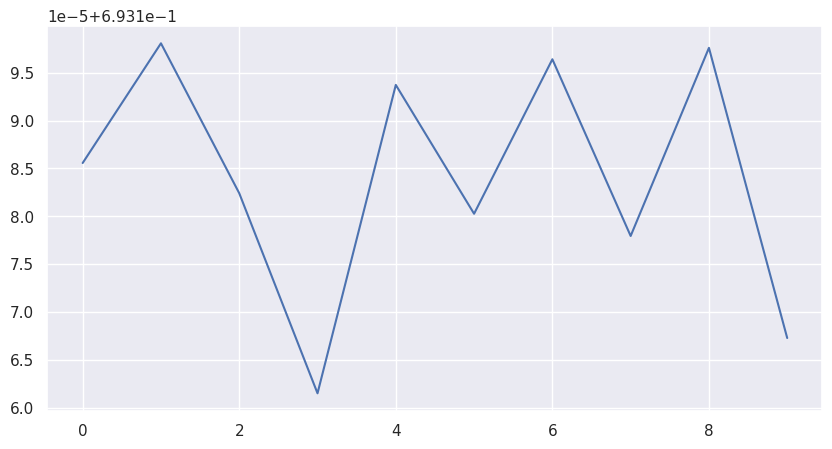

In [ ]:
# predicting the test data
y_pred = classifier.predict(xtest)
y_pred = (y_pred>0.5)
plt.plot(ann_model.history['loss'])

#### Hyper-Tuning

In [ ]:
# Random Forest Parameters
rfparams = {"max_depth": [3, None],
              "max_features": randint(1, 4),
              "min_samples_leaf": randint(1, 4),
              "criterion": ["gini", "entropy"]}

# Logistic Regression Parameters
lrparams = {"solver" : ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
            "penalty" : ['l2', 'l1','elasticnet'],
            "C" : [100, 10, 1.0, 0.1, 0.01]
            }


hyper_tunning = {"Logistic Regression" : [lr_model, lrparams],
                 "Random Forest" : [rfmodel, rfparams]

}

In [ ]:
# Hypertuning with RandomizedSearchCV

cv = StratifiedKFold(n_splits=10)

for name, model in hyper_tunning.items():
  grid = RandomizedSearchCV(estimator = model[0], param_distributions = model[1], cv = 5, scoring = 'accuracy')
  grid.fit(xtrain, ytrain)
  print(f"Parameters: {grid.best_params_}")
  print(f"Best score is {grid.best_score_}")

Parameters: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}
Best score is 0.5005428571428572
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 1}
Best score is 0.5032285714285715
